In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
import pandas as pd
import os
import matplotlib.cm as cm 
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
def get_wells_from_section(path):
    reads = path.xpath("*/Well")
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(float(s.text), r.attrib['Pos'])
         for r in reads
         for s in r]

    datalist = {
      well : value
      for (value, well) in data
    }
    
    welllist = [
                [
                 datalist[chr(64 + row) + str(col)]          
                 if chr(64 + row) + str(col) in datalist else None
                 for row in range(1,9)
                ]
                for col in range(1,13)
                ]
                
    return welllist

In [12]:
file_GEF = "2015-08-03 17-20-41_GEF.xml"
file_BOS = "2015-08-03 17-25-47_BOS.xml"
file_name = os.path.splitext(file_GEF)[0]

In [13]:
root = etree.parse(file_GEF)

In [14]:
#Just going to work with topread for now
TopRead = root.xpath("/*/Section")[0]
welllist = get_wells_from_section(TopRead)
dataframe = pd.DataFrame(welllist, columns = ['A - Src','B - Buffer','C - Src','D - Buffer', 'E - Src','F - Buffer','G - Src','H - Buffer'])

(-0.5, 11.5)

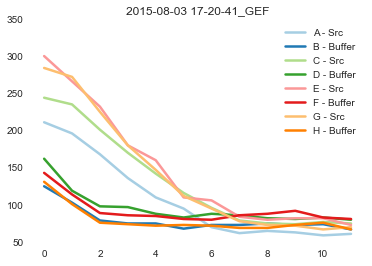

In [15]:
sns.set_palette("Paired", 10)
sns.set_context("notebook", rc={"lines.linewidth": 2.5})

dataframe.plot(figsize=(6, 4), title=file_name)
plt.xlim(-0.5,11.5)


In [16]:
file_name = os.path.splitext(file_BOS)[0]
root = etree.parse(file_BOS)

In [17]:
#Just going to work with topread for now
TopRead = root.xpath("/*/Section")[0]
welllist = get_wells_from_section(TopRead)
dataframe = pd.DataFrame(welllist, columns = ['A - Src','B - Buffer','C - Src','D - Buffer', 'E - Src','F - Buffer','G - Src','H - Buffer'])

(-0.5, 11.5)

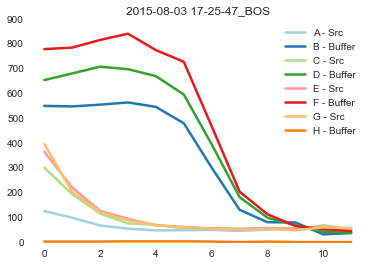

In [18]:
sns.set_palette("Paired", 10)
sns.set_context("notebook", rc={"lines.linewidth": 2.5})

dataframe.plot(figsize=(6, 4), title=file_name)
plt.xlim(-0.5,11.5)
